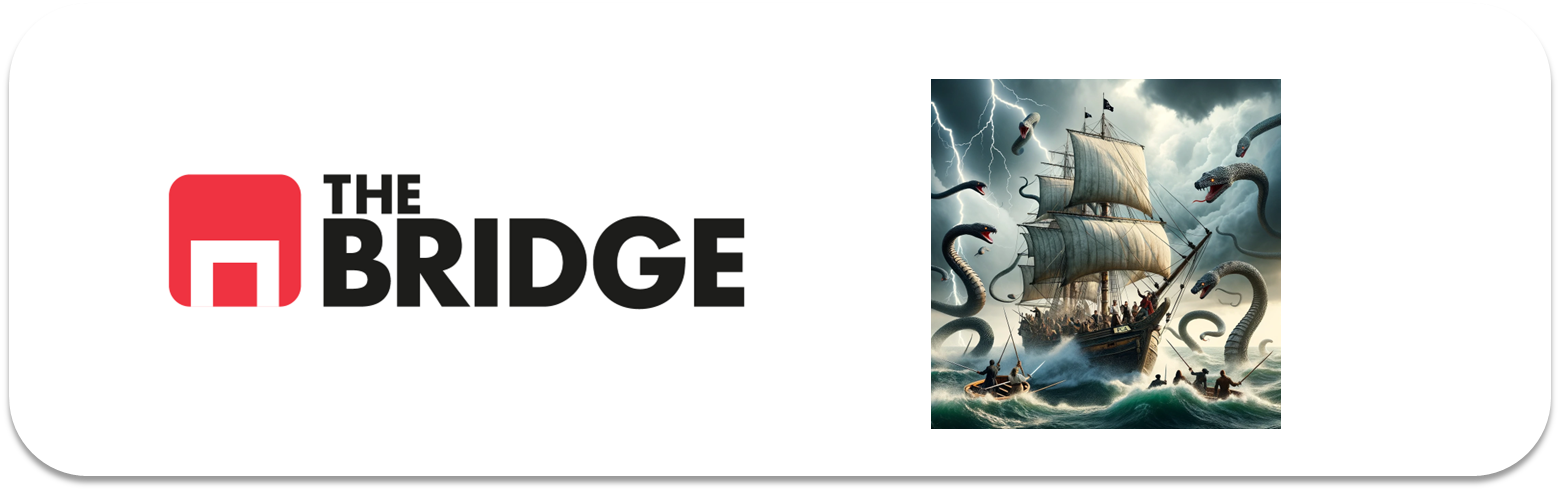

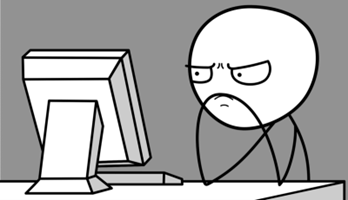

Para ejercitarte y afianzar lo aprendido sobre **PCA**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)

La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

# Principal Components Analysis: Nutrition
En esta colección de ejercicios no vas a montar ningún modelo de Machine Learning supervisado, sino que vas a practicar con PCA: pretratar el dato antes de calcular sus PCs, interpretarlas, pintar y escoger número de componentes según varianza.


### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import numpy as np
import pandas as pd

### Ejercicio 1: Importa los datos
1. Importa los datos: *nutrition.csv*
2. Observa las columnas que hay, así como su tipo.

In [2]:

df=pd.read_csv('./data/nutrition.csv')
df.head(5)

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   float64
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   float64
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


### Ejercicio 2


Analiza la correlación entre las variables numéricas. 

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo columnas numéricas
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()

# Mostrar la matriz de correlación
correlation_matrix


,ID,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
ID,1.000000,0.126126,0.075538,-0.011996,0.177297,0.082710,0.008252,-0.031211,-0.060463,0.016512,...,-0.051166,0.010387,-0.024343,0.011311,-0.050720,-0.003765,-0.001867,0.045925,0.011775,0.009195
Energy_kcal,0.126126,1.000000,0.110302,0.806795,0.487096,0.313151,0.197338,0.026329,0.121872,-0.012292,...,0.145936,0.174991,0.155830,0.187439,0.123571,0.099513,0.255880,0.195181,0.056673,0.112766
Protein_g,0.075538,0.110302,1.000000,0.054715,-0.301974,-0.266170,-0.072777,0.026483,0.228485,0.245423,...,0.008939,0.376939,0.202480,0.098360,0.046888,0.158900,0.218611,0.444608,0.378369,0.416315
Fat_g,-0.011996,0.806795,0.054715,1.000000,-0.054116,-0.001962,-0.028842,0.024379,-0.046950,-0.020786,...,-0.058049,-0.022671,-0.036286,-0.005785,0.015039,0.042765,0.070781,0.066086,0.037559,0.028264
Carb_g,0.177297,0.487096,-0.301974,-0.054116,1.000000,0.615344,0.458192,0.001871,0.195571,-0.094636,...,0.325170,0.173285,0.232408,0.281809,0.189106,0.062106,0.287207,0.073180,-0.114600,-0.012187
Sugar_g,0.082710,0.313151,-0.266170,-0.001962,0.615344,1.000000,0.115916,0.010143,0.088767,-0.050450,...,0.161257,0.034378,0.125225,0.097751,0.129540,-0.005837,0.041308,-0.049784,-0.123708,-0.021991
Fiber_g,0.008252,0.197338,-0.072777,-0.028842,0.458192,0.115916,1.000000,0.005910,0.242804,-0.052045,...,0.249075,0.135257,0.157703,0.205211,0.232286,0.185044,0.542038,0.158422,-0.035897,0.085154
VitA_mcg,-0.031211,0.026329,0.026483,0.024379,0.001871,0.010143,0.005910,1.000000,0.136605,0.581004,...,0.108517,0.151679,0.325709,0.052921,0.034822,0.569945,0.024572,0.055814,0.048043,0.070541
VitB6_mg,-0.060463,0.121872,0.228485,-0.046950,0.195571,0.088767,0.242804,0.136605,1.000000,0.264325,...,0.550087,0.714143,0.581678,0.417011,0.177268,0.116326,0.293169,0.213395,0.109004,0.447143
VitB12_mcg,0.016512,-0.012292,0.245423,-0.020786,-0.094636,-0.050450,-0.052045,0.581004,0.264325,1.000000,...,0.158483,0.279033,0.436182,0.099601,0.011715,0.570642,0.004124,0.148774,0.215308,0.298136


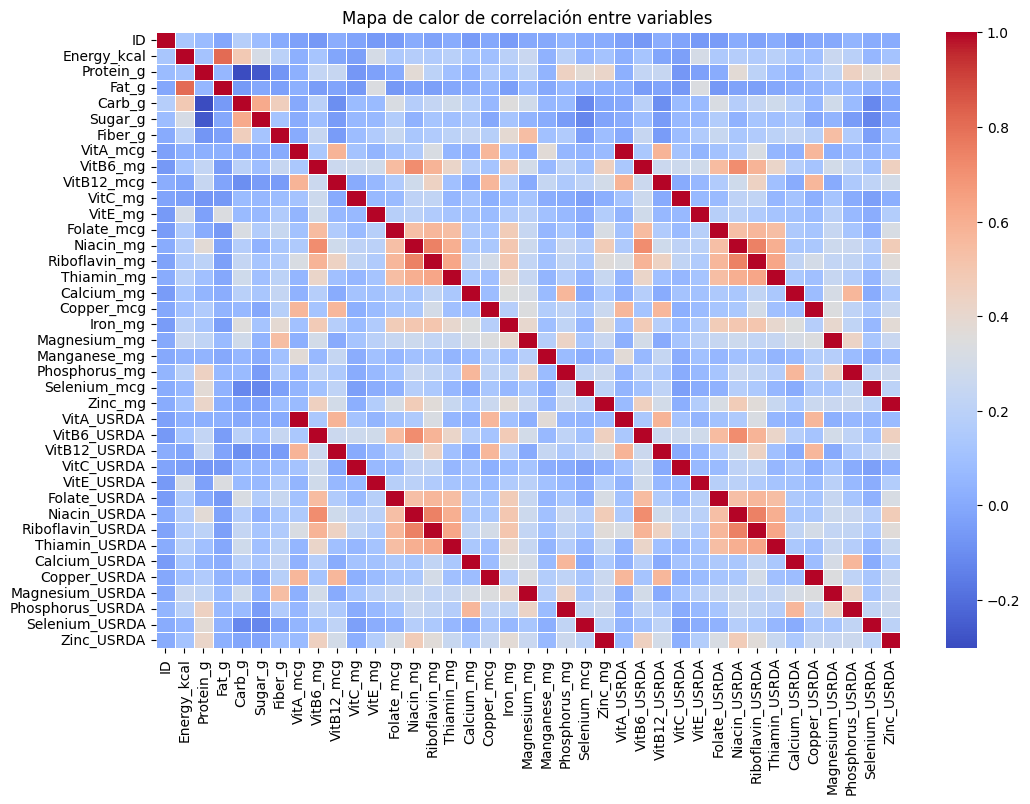

In [6]:
# Ajustar el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Crear un heatmap con seaborn
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)

# Mostrar el gráfico
plt.title('Mapa de calor de correlación entre variables')
plt.show()


### Ejercicio 3

¿Qué pasa con las columnas USRDA? ¿Hay que tomar alguna decisión?

In [ ]:
#sí, hay qe eliminarlas por que otras columnas ya contienen la misma información.

### Ejercicio 4: Variables Categóricas

Podríamos analizar las variables no numéricas del dataset e intentar obtener más información, pero por simplicidad en este caso procedemos a eliminarlas. Elimina las variables de texto del dataset.

In [10]:
# Eliminar columnas de texto y las columnas que contienen 'USRDA' en el nombre
df_cleaned = df.select_dtypes(include=['float64', 'int64']).drop(columns=df.filter(like='USRDA').columns)

# Verificar las columnas restantes
print(df_cleaned.columns)



Index(['ID', 'Energy_kcal', 'Protein_g', 'Fat_g', 'Carb_g', 'Sugar_g',
       'Fiber_g', 'VitA_mcg', 'VitB6_mg', 'VitB12_mcg', 'VitC_mg', 'VitE_mg',
       'Folate_mcg', 'Niacin_mg', 'Riboflavin_mg', 'Thiamin_mg', 'Calcium_mg',
       'Copper_mcg', 'Iron_mg', 'Magnesium_mg', 'Manganese_mg',
       'Phosphorus_mg', 'Selenium_mcg', 'Zinc_mg'],
      dtype='object')


### Ejercicio 5: Distribuciones

Analiza la distribución de las variables/columnas/features restantes. Recuerda que PCA es altamente sensible a las escala, así que transforma aquellas variables que creas necesario antes de proceder a escalarlas.


<Figure size 1500x1000 with 0 Axes>

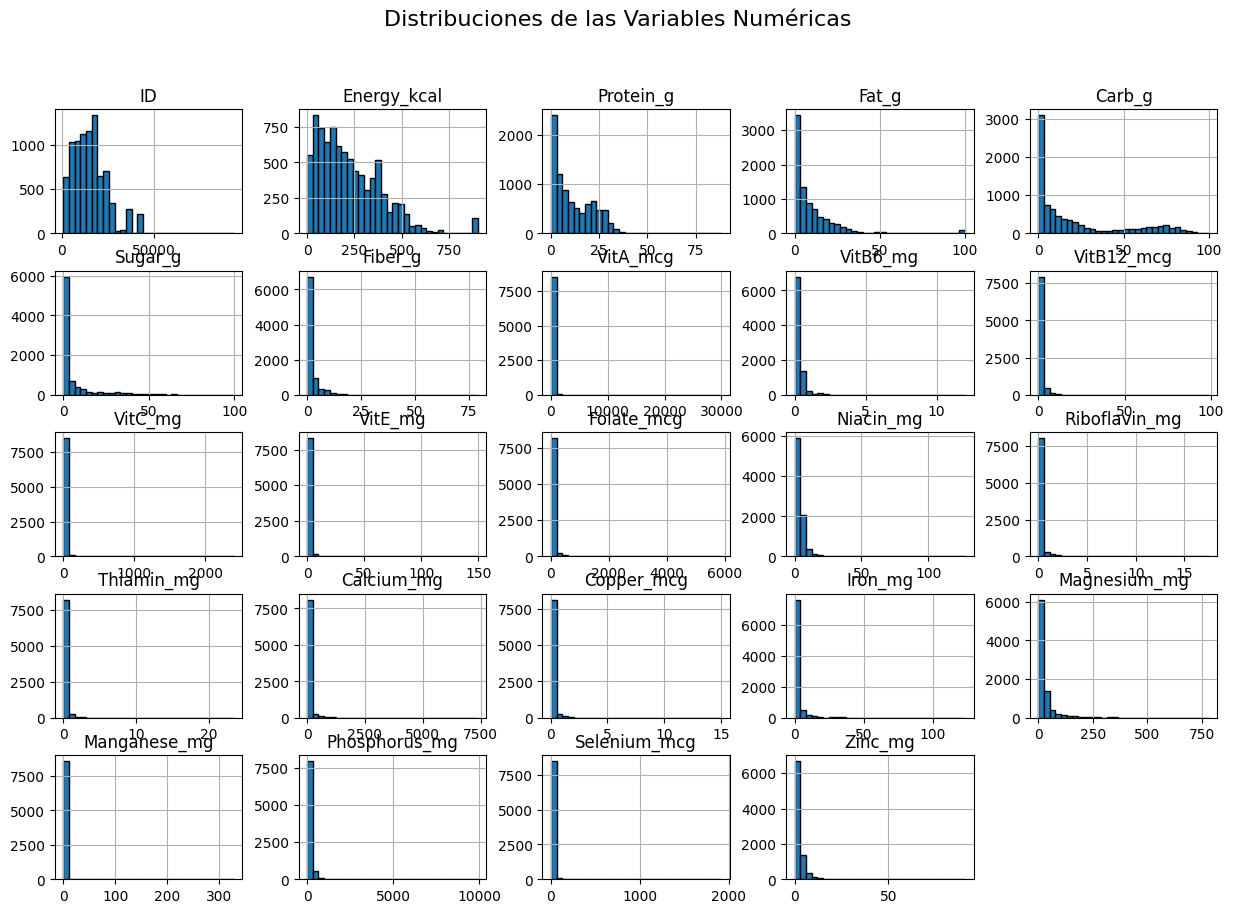

In [11]:
# Configurar tamaño de los gráficos
plt.figure(figsize=(15, 10))

# Crear histogramas para cada variable numérica
df_cleaned.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle('Distribuciones de las Variables Numéricas', fontsize=16)
plt.show()


In [12]:
# Calcular asimetría de las variables
skewness = df_cleaned.skew().sort_values(ascending=False)
print(skewness)

Manganese_mg     39.741772
Selenium_mcg     38.207299
VitC_mg          30.907462
VitA_mcg         24.090421
Phosphorus_mg    18.553944
Thiamin_mg       17.510062
Copper_mcg       15.943149
VitE_mg          13.849434
Calcium_mg       13.427978
VitB12_mcg       13.034297
Riboflavin_mg    11.312592
Folate_mcg       10.327038
Zinc_mg           9.629128
VitB6_mg          7.557554
Iron_mg           6.839288
Niacin_mg         6.435334
Fiber_g           5.793241
Magnesium_mg      5.565037
Fat_g             3.306166
Sugar_g           2.953324
ID                1.185587
Protein_g         1.170610
Energy_kcal       1.168243
Carb_g            1.157211
dtype: float64


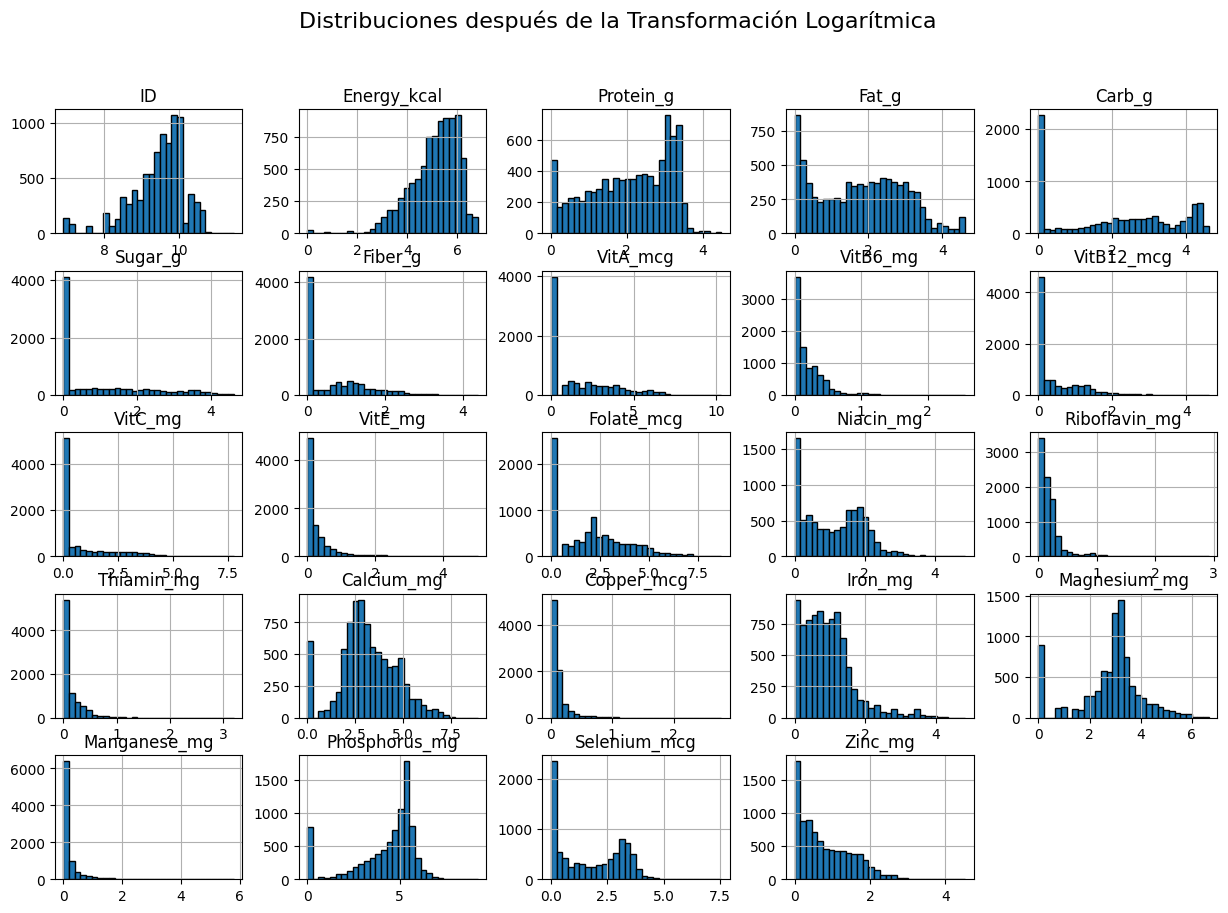

In [13]:
# Aplicar transformación logarítmica a variables con alto sesgo
skewed_features = skewness[abs(skewness) > 1].index
df_cleaned[skewed_features] = np.log1p(df_cleaned[skewed_features])

# Volver a graficar las distribuciones después de la transformación
df_cleaned.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle('Distribuciones después de la Transformación Logarítmica', fontsize=16)
plt.show()


In [14]:
from sklearn.preprocessing import StandardScaler

# Escalar los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cleaned)


### Ejercicio 6: Estandarizado
Estandariza cada variable. (No es necesario que dividas en train y test por simplificar).

In [15]:
print(df_scaled.mean().round(2))  # Debería estar cerca de 0
print(df_scaled.std().round(2))   # Debería estar cerca de 1


0.0
1.0


### Ejercicio 7: Implementación del PCA
Prueba a montar un PCA con todos los componentes. Para ello utiliza los datos previamente transformados y escalados.

In [16]:
from sklearn.decomposition import PCA

# Inicializar PCA con todos los componentes
pca = PCA(n_components=df_scaled.shape[1])

# Ajustar PCA a los datos escalados
principal_components = pca.fit_transform(df_scaled)

# Convertir en DataFrame para mejor visualización
df_pca = pd.DataFrame(principal_components, columns=[f'PC{i+1}' for i in range(df_scaled.shape[1])])

# Mostrar las primeras filas del resultado
print(df_pca.head())


        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -2.254172 -0.864286 -0.068343  0.725155  5.309627  0.278329 -1.943614   
1 -2.221566 -0.805947 -0.048057  0.716533  5.282442  0.318619 -1.971784   
2 -3.381271 -1.038799  0.474542  1.650204  5.350524  1.293928 -2.081512   
3  1.409058 -1.152702 -1.430842 -0.616309  3.647042 -2.149937 -2.209234   
4  1.123787 -1.093036 -1.326571 -0.858790  3.929694 -2.392220 -2.149718   

        PC8       PC9      PC10  ...      PC15      PC16      PC17      PC18  \
0 -0.080097  1.129870 -0.622325  ... -0.162994 -0.541576 -0.015918  0.278724   
1 -0.021596  1.154111 -0.657580  ... -0.103173 -0.453210 -0.066307  0.204950   
2  0.195344  1.431920 -0.784906  ... -0.196916 -0.187188 -0.164717  0.306083   
3  0.273719 -0.065617  0.004624  ... -0.468188 -0.678132  0.198728  0.133692   
4  0.588483 -0.169399 -0.216824  ... -0.206433 -0.622339  0.380083  0.419544   

       PC19      PC20      PC21      PC22      PC23      PC24  
0  0

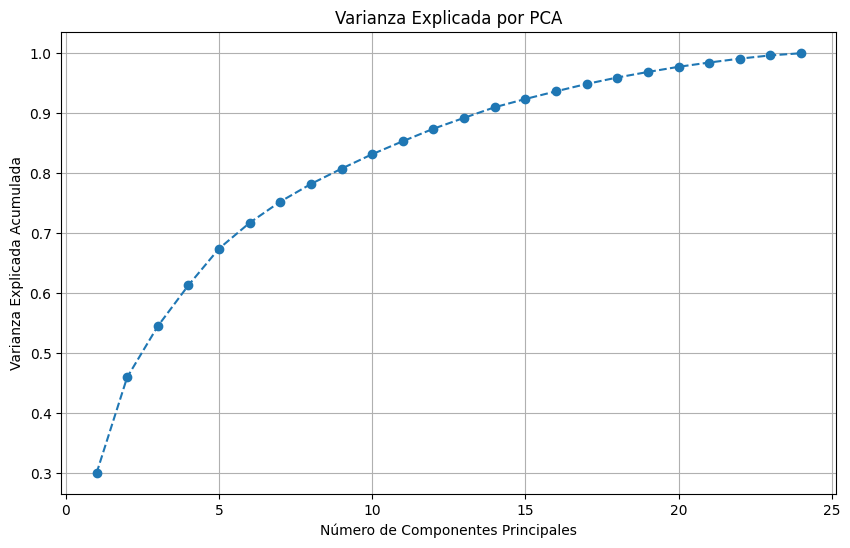

In [17]:
import matplotlib.pyplot as plt

# Graficar la varianza explicada acumulada
plt.figure(figsize=(10, 6))
plt.plot(range(1, df_scaled.shape[1] + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada por PCA')
plt.grid()
plt.show()


### Ejercicio 8

Muestra en un dataframe la relación de cada componente con cada feature. En general, este paso no lo haremos salvo que sea necesario a posteriori explicar la influencia de alguna componente en función de las features originales, pero ahora, muéstralas.

            ID  Energy_kcal  Protein_g     Fat_g    Carb_g   Sugar_g  \
PC1   0.032367     0.198584   0.278323  0.148299  0.003324 -0.026548   
PC2  -0.028502     0.004060  -0.242437 -0.150696  0.437320  0.319496   
PC3   0.284692     0.476452   0.082978  0.406847  0.224346  0.167852   
PC4  -0.052387     0.095551  -0.131332  0.072172  0.039933  0.291156   
PC5  -0.377853     0.244618  -0.038596  0.411002 -0.064537  0.084570   
PC6   0.029334    -0.057591  -0.132409  0.034228 -0.197073 -0.229103   
PC7   0.810413    -0.045332  -0.033177 -0.018654  0.017405  0.140472   
PC8   0.061457     0.053836   0.005538  0.053950  0.062648  0.152158   
PC9   0.181150     0.016634  -0.069448  0.049936  0.057378 -0.378061   
PC10 -0.140517     0.051521  -0.116787 -0.190302  0.157994  0.475516   
PC11 -0.027094     0.293755   0.015147  0.313652  0.032992 -0.194759   
PC12  0.109463    -0.071428   0.004851 -0.025930 -0.025321 -0.084004   
PC13  0.083995    -0.113299  -0.014624 -0.032663 -0.018271  0.02

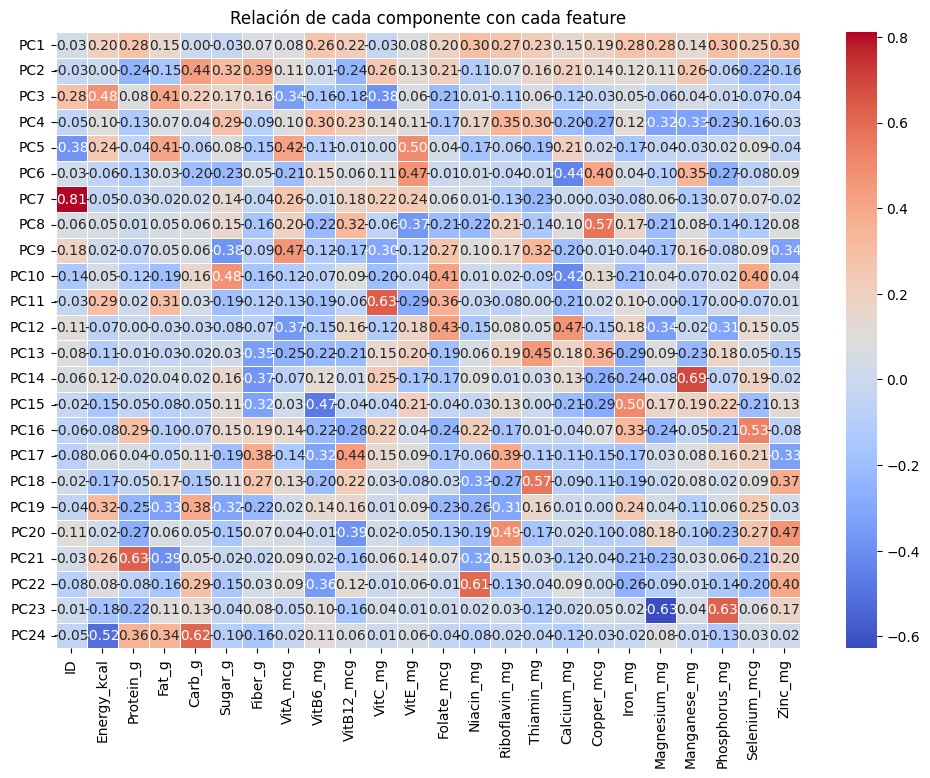

In [19]:
# Obtener las cargas del PCA (matriz de componentes)
pca_components = pd.DataFrame(pca.components_, 
                              columns=df_cleaned.columns,  # Usamos las columnas originales antes del escalado
                              index=[f'PC{i+1}' for i in range(df_scaled.shape[1])])

# Mostrar la matriz de cargas
print(pca_components)

# Visualizar con un heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pca_components, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title("Relación de cada componente con cada feature")
plt.show()


### Ejercicio 9: Aportación de cada PCA
Visualiza en un diagrama de líneas la suma acumulada de la varianza explicativa del PCA.

Si tuviéses que quedarte con 70-75 % de la varianza original, ¿con cuántos Principal Components te quedarías?

### Ejercicio 10: Reducción de features

Crea un nuevo PCA con X Principal Components, siendo X la cantidad de PC escogidos en el apartado anterior.

Obtén el nuevo dataset con el mismo número de registros que el original, pero en este caso con X features, que representan los PC elegidos.